In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Beam pattern of a single dish

The beam of a single dish is exactly analogous to the diffraction pattern of a circular aperature. The width of the beam scales inversely as the diameter of the dish.

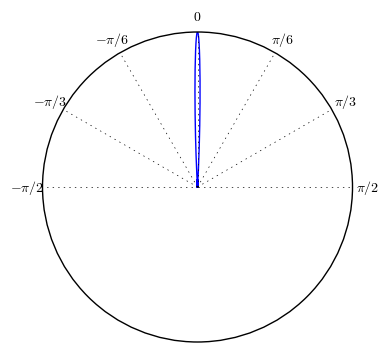

In [2]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = 200 #wavelength
a = 2800 #diameter of dish
I = (np.sinc(a*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)

# Beam Pattern of Interferometer

An interferometer modulates the beam pattern of a single dish- exactly like interference between multiple finite width slits.

# Effect of Diameter, Distance, Number:

## Single dish

The only parameter you can vary for a single dish antenna (assuming a parabolic surface) is the diameter of the aperture. The directionality of the beam response changes as a function of $\left(\frac{\lambda}{a}\right)$ exactly like the resolution of optical telescopes.

## Interferometer

Under the assumption of identical antennas, you can vary three parameters individually- the diameter of all the dishes, the distance between the dishes and total number of dishes.

1. Increasing **aperture** of each dish: Decreases width of primary beam.
2. Increasing **distance** between dishes: Increases fringes in the primary beam.
3. Increasing **number** of dishes: Modulates the amplitude of fringes based on value of $\left(\frac{a}{d}\right)$.

At the optimal point where $\left(\frac{a}{d}\right) = 1$, increasing N preferentially increases the amplitude of the primary beam.

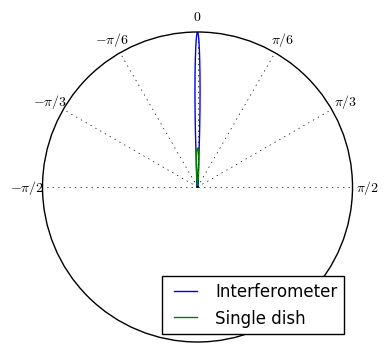

In [3]:
## Compare the beam of a single dish with an interferometer.

theta = np.linspace(-np.pi/2,np.pi/2,num=10000)
wv = 200  # wavelength in cm

## The single dish 
a = 1400  # diameter in cm

## Interferometer
d = 1400 # distance between antennas in cm
N = 2    # number of antennas

phi = np.pi*d*np.sin(theta)/wv
I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2 

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I,label='Interferometer')
ax.plot(theta,(np.sinc(a*np.sin(theta)/wv))**2,label='Single dish')
ax.legend(loc=4)

## Plot below:

### Fixed number of antennas:

If you have a fixed number of antennas- placing them farthest away from each other is the best for resolution. With increasing distance:

1. Grating lobes increase.
2. Beam width of the fringes decreases.

### Fixed distance:

If you have fixed real estate to build antennas- building as many as you can is the best for resolution. With increasing number of antennas:

1. Amplitude of the fringes gets modulated- the central beam is more and more peaked.
2. Some grating lobes are supressed.

The optimum is reached when the entire area is filled with dishes. When antennas are placed next to each other, the grating lobes disappear entirely and you are left with a large amplitude primary maxima.

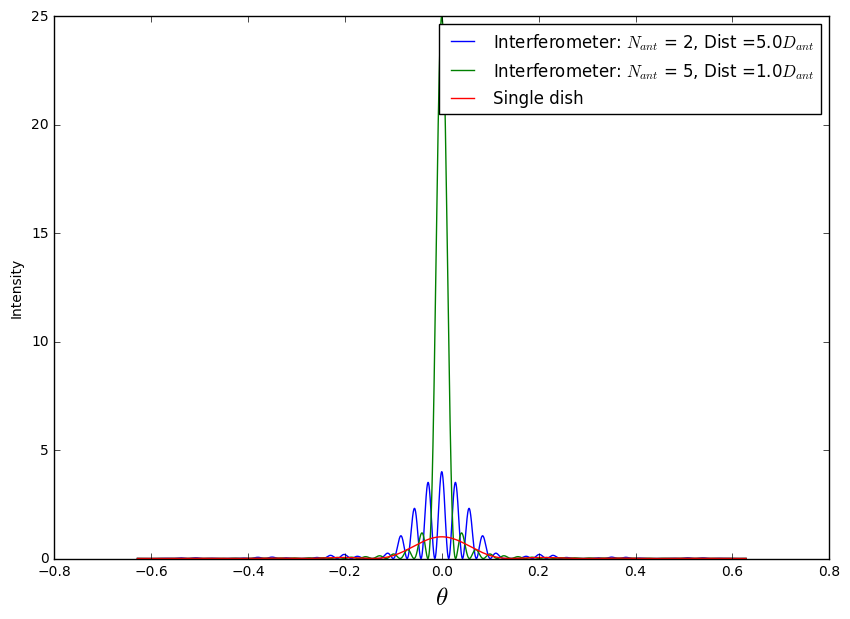

In [4]:
## A closer comparision of a single dish and an interferometer close to the zenith.

fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')

theta = np.linspace(-np.pi/5,np.pi/5,num=10000)
wv = 200    # wavelength cm
a = 1400    # diameter cm
d = 5*a     # distance between antennas

phi = np.pi*d*np.sin(theta)/wv
I_dist = ((np.sin(2*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_dist,label=r'Interferometer: $N_{ant}$ = 2, Dist =%.1f$D_{ant}$'%(d/a))

d = 1*a     # distance between antennas
N = 5       # number of antennas
phi = np.pi*d*np.sin(theta)/wv
I_nant = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_nant,label='Interferometer: $N_{ant}$ = %d, Dist =%.1f$D_{ant}$'%(N,d/a))

I_dish = (np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_dish,label='Single dish')

ax.legend(loc=1)

# FFT Beamforming

## General Beamforming

Beamforming is the process of phasing this synthesized beam in an arbitrary direction. By adding predetermined offsets to the signal of each antenna, the primary beam can be steered to any angle 
?? within the envelope of the primary beam of each dish.

This is what is usually done with interferometers when they are tracking a known source in the sky.

?? Won't the sources in the grating lobes get tracked as well?

## Analogy between beams and time sampling

FFT Beamforming is the process by which you form all possible beams on the sky in one go. This is extremely useful for sky surveys when you do not apriori know the direction you want to pick in the sky.

The number of beams constructed by FFT beamforming is equal to the number of antennas in the array, exactly analogous to the number of frequency bins being equal to the number of time samples you consider for the FFT. From time sampling you know that:

$$\Delta f \propto \frac{1}{T}$$

$$BW \propto \frac{1}{\Delta t}$$

Extending the analogy we began above:

1. **Beams** of antennas = Frequency **channels**
2. **Antennas** = **Time samples**
3. **High resolution** => Small $\Delta f$ => Large T => **Large baselines**
4. **Large Sky coverage** => Large BW => Small $\Delta t$ => **Densely packed grid**

## Math of FFT Beams

The straight forward DFT of a function $f_n$ is given by the following formula. 

$$F_k = \sum_{n=0}^{N-1} f_n e^{-2\pi i k n/N}$$

$f_n$ in this case is the electric field sampled by the $n^{th}$ antenna in the array. If the path difference between the antennas is given by $\phi = \frac{\pi d \sin\theta}{\lambda}$ , the electric field sampled by antenna $n$ is:

$$f_n = \mathbf{E}_n = \mathbf{E}_0sin(kx+\omega t + n\phi)$$

Substituting this in the above equation:

\begin{align}
F_k &= \sum_{n=0}^{N-1} \mathbf{E}_0 e^{i(kx+\omega t + n\phi)} e^{-2\pi i k n/N} \\
&= \mathbf{E}_0 e^{i(kx+\omega t)} \sum_{n=0}^{N-1} e^{in(\phi-2\pi k /N)}
\end{align}

Define effective phase offset $\phi'$ as:

$$\phi' = \phi-2\pi k/N$$

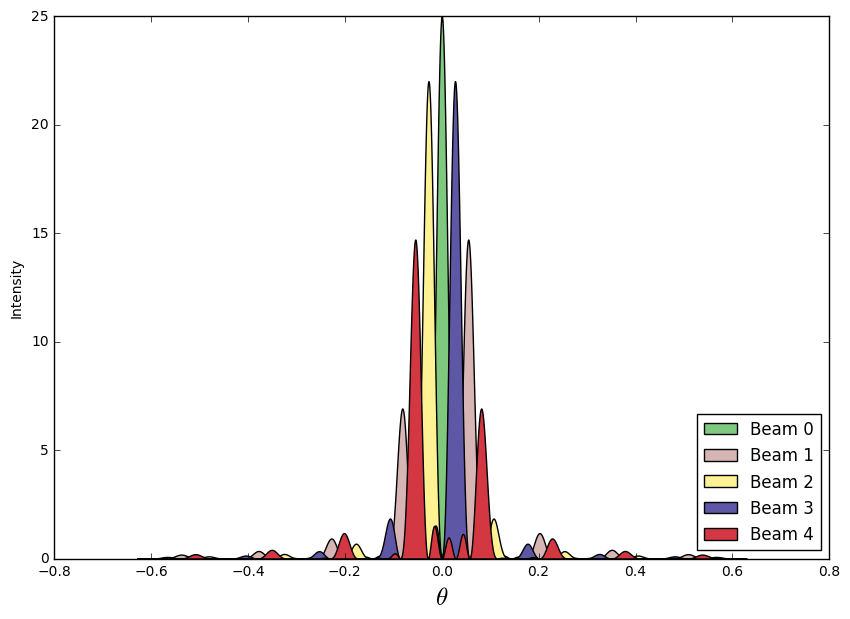

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
cmap = matplotlib.cm.get_cmap('Accent')

theta = np.linspace(-np.pi/5,np.pi/5,num=10000)
wv = 200
a  = 1400
d  = 1400
N  = 5

# phi_k = phi - 2*np.pi*k/N
for k in range(N):
    phi = np.pi*d*np.sin(theta)/wv - 2*np.pi*k/N
    I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
    ax.fill_between(theta,0,I,facecolor=cmap(1.0*k/N),label='Beam %d'%k)
    
ax.legend(loc=4)

# Effect of Frequency on Beams

At a higher frequency, the beams are closer together. If the bandwidth of your instrument is high you should take this into account before stacking images.

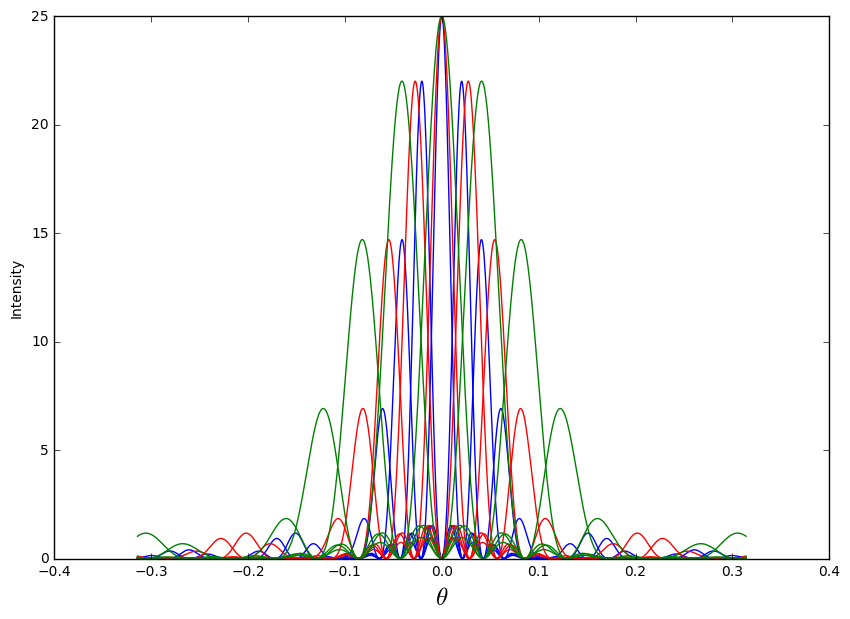

In [6]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
c = {150:'b',200:'r',300:'g'}

theta = np.linspace(-np.pi/10,np.pi/10,num=1000)
wv = [150,200,300]
a  = 1400
d  = 1400
N  = 5

for l in wv:
    for k in range(N):
        phi = np.pi*d*np.sin(theta)/l - 2*np.pi*k/N
        I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/l))**2
        ax.plot(theta,I,color=c[l])
    
#ax.legend(loc=4)

# Effect of Zero Padding

Zero padding antennas has the exact same effect zero padding in time domain has- it increases the number of beams where the additional beams are interpolation of the existing ones.

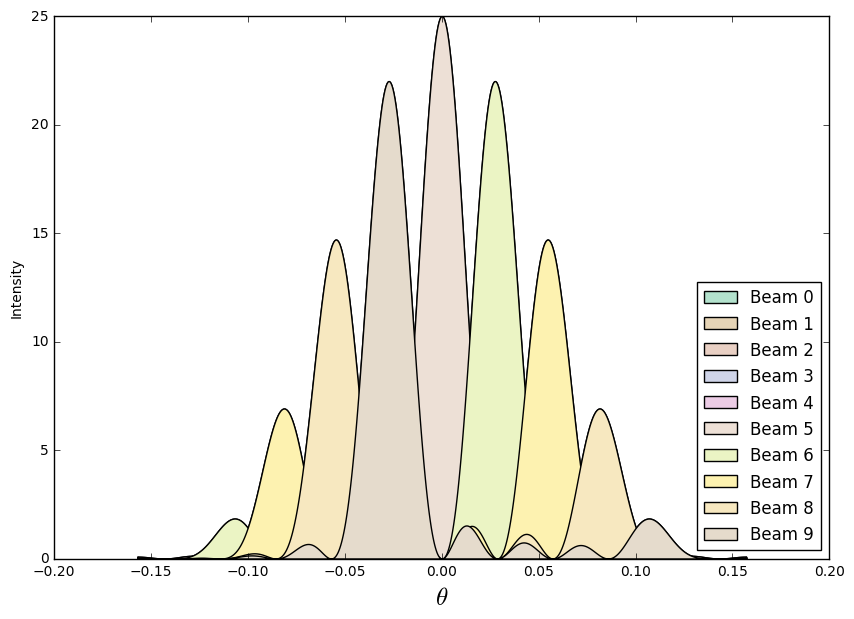

In [12]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
cmap = matplotlib.cm.get_cmap('Pastel2')

theta = np.linspace(-np.pi/20,np.pi/20,num=10000)
wv = 200
a  = 1400
d  = 1400
N  = 5

# phi_k = phi - 2*np.pi*k/N
for k in range(10):
    phi = np.pi*d*np.sin(theta)/wv - 2*np.pi*k/10
    I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
    ax.fill_between(theta,0,I,facecolor=cmap(1.0*k/10),label='Beam %d'%k)
    
ax.legend(loc=4)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,4))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('HERA Specs')

theta = np.linspace(-np.pi/500,np.pi/500,num=1000)
wv = [210, 250, 300]  # wavelength
a = 1400               # diameter
d = 1400              # distance between antennas
N = 256                # number of antennas

I = {}
for l in wv:
    phi  = np.pi*d*np.sin(theta)/l
    I[l] = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/l))**2
    ax.plot(theta,I[l],label=r'$\lambda = %d cm$'%l)
    
ax.legend()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,4))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')
ax.set_title('CHIME Specs')

theta = np.linspace(-np.pi/2,np.pi/2,num=10000)
wv = [75, 50, 37.5]    # wavelength
a = 0.01                 # diameter
d = 30.48             # distance between antennas
N = 256                # number of antennas

I = {}
for l in wv:
    phi  = np.pi*d*np.sin(theta)/l
    I[l] = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/l))**2
    ax.plot(theta,I[l],label=r'$\lambda = %d cm$'%l)
    
ax.legend()

In [ ]:
ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
for l in wv:
    ax.plot(theta,I[l],label=r'$\lambda = %d cm$'%l)
ax.legend()